In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('iris.csv', delimiter=',', names=['sepal length(cm)', 'sepal width(cm)', 'petal length(cm)', 
                                                   'petal width(cm)', 'class'])
df

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal length(cm)  150 non-null    float64
 1   sepal width(cm)   150 non-null    float64
 2   petal length(cm)  150 non-null    float64
 3   petal width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isna().sum()

sepal length(cm)    0
sepal width(cm)     0
petal length(cm)    0
petal width(cm)     0
class               0
dtype: int64

In [16]:
df['class'].value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: class, dtype: float64

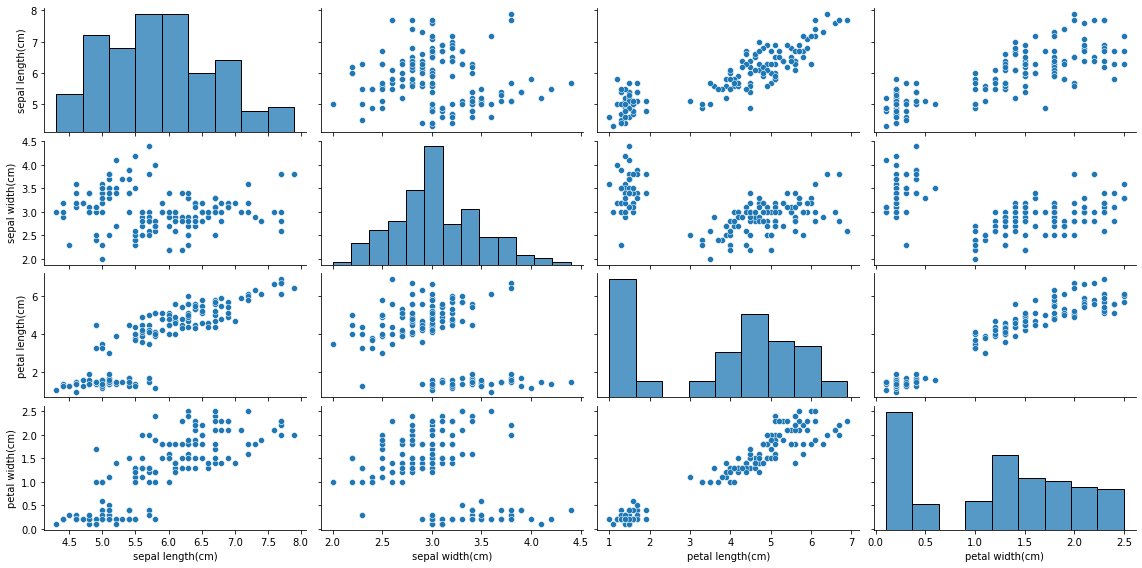

In [17]:
sns.pairplot(df, height = 2, aspect = 2);

<AxesSubplot:>

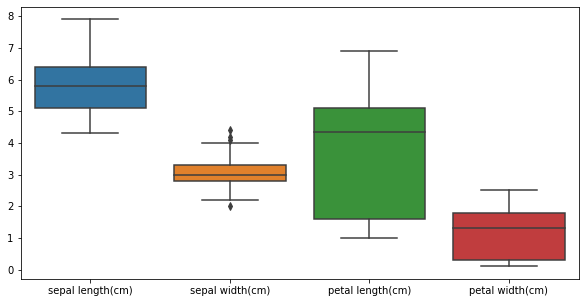

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, ax=ax)

In [19]:
df.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
x_train, x_test, y_train, y_test = train_test_split( df.drop(columns = 'class'), df['class'], test_size = 0.2, shuffle = True, 
                                                   stratify = df['class'], random_state =4)

In [22]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression())])

In [23]:
pipe.score(x_test, y_test)

0.9666666666666667

In [24]:
predicted_prob = pipe.predict_proba(x_test)[:, 1]
predicted_y = pipe.predict(x_test)

In [25]:
predicted_y = np.where(predicted_prob >0.5,1,0)
predicted_y

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0])

#### EVALUATION

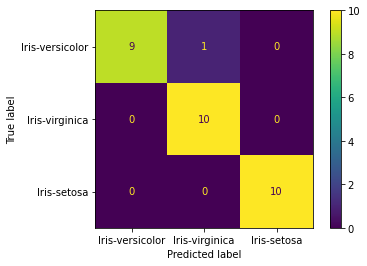

In [26]:
plot_confusion_matrix(pipe , x_test, y_test, labels = ['Iris-versicolor','Iris-virginica','Iris-setosa'],
                     display_labels = ['Iris-versicolor','Iris-virginica','Iris-setosa'], values_format ='d');

In [27]:
print(classification_report(y_test, predicted_y))

ValueError: Mix of label input types (string and number)